In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import kagglehub

## Download the dataset from Kaggle

In [9]:
# Download latest version

path = kagglehub.dataset_download("juhibhojani/house-price")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/house-price


# Read the csv file into a Pandas DataFrame

In [6]:
import pandas as pd

df = pd.read_csv("/kaggle/input/house-price/house_prices.csv")
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

In [10]:
df.head()

Index                                              Title  \
0      0  1 BHK Ready to Occupy Flat for sale in Srushti...   
1      1  2 BHK Ready to Occupy Flat for sale in Dosti V...   
2      2  2 BHK Ready to Occupy Flat for sale in Sunrise...   
3      3        1 BHK Ready to Occupy Flat for sale Kasheli   
4      4  2 BHK Ready to Occupy Flat for sale in TenX Ha...   

                                         Description Amount(in rupees)  \
0  Bhiwandi, Thane has an attractive 1 BHK Flat f...           42 Lac    
1  One can find this stunning 2 BHK flat for sale...           98 Lac    
2  Up for immediate sale is a 2 BHK apartment in ...          1.40 Cr    
3  This beautiful 1 BHK Flat is available for sal...           25 Lac    
4  This lovely 2 BHK Flat in Pokhran Road, Thane ...          1.60 Cr    

   Price (in rupees) location Carpet Area         Status         Floor  \
0             6000.0    thane    500 sqft  Ready to Move  10 out of 11   
1            13799.0    thane    473 sqft  Ready to Move   3 out of 22   
2            17500.0    thane    779 sqft  Ready to Move  10 out of 29   
3                NaN    thane    530 sqft  Ready to Move    1 out of 3   
4            18824.0    thane    635 sqft  Ready to Move  20 out of 42   

  Transaction  ... facing             overlooking  \
0      Resale  ...    NaN                     NaN   
1      Resale  ...   East             Garden/Park   
2      Resale  ...   East             Garden/Park   
3      Resale  ...    NaN                     NaN   
4      Resale  ...   West  Garden/Park, Main Road   

                               Society Bathroom Balcony Car Parking  \
0  Srushti Siddhi Mangal Murti Complex        1       2         NaN   
1                          Dosti Vihar        2     NaN      1 Open   
2                 Sunrise by Kalpataru        2     NaN   1 Covered   
3                                  NaN        1       1         NaN   
4          TenX Habitat Raymond Realty        2     NaN   1 Covered   

              Ownership Super Area Dimensions  Plot Area  
0                   NaN        NaN        NaN        NaN  
1              Freehold        NaN        NaN        NaN  
2              Freehold        NaN        NaN        NaN  
3                   NaN        NaN        NaN        NaN  
4  Co-operative Society        NaN        NaN        NaN  

[5 rows x 21 columns]

# Check for missing values in the dataset
- Visualize the null values using a heatmap


In [11]:
df.isnull().sum()

Index                     0
Title                     0
Description            3023
Amount(in rupees)         0
Price (in rupees)     17665
location                  0
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
overlooking           81436
Society              109678
Bathroom                828
Balcony               48935
Car Parking          103357
Ownership             65517
Super Area           107685
Dimensions           187531
Plot Area            187531
dtype: int64

<Axes: >

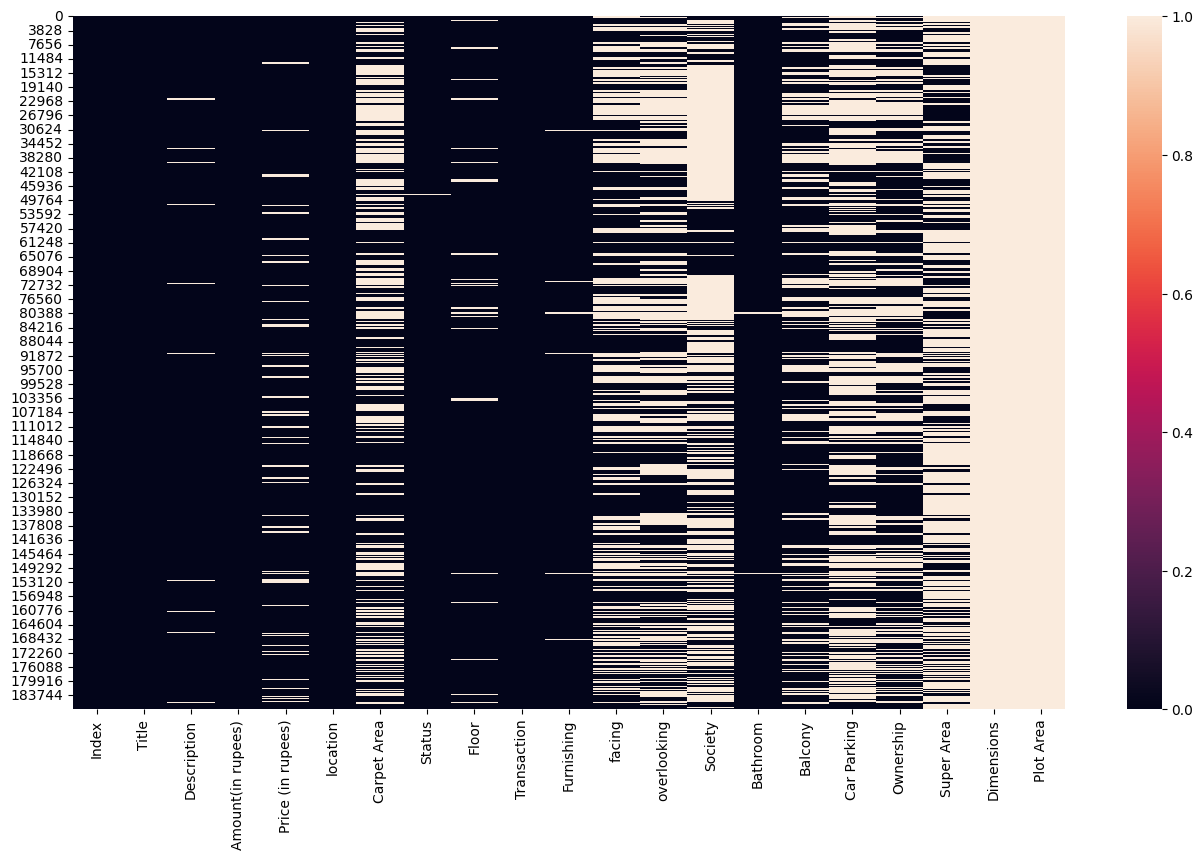

In [12]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

# Convert Amount(in rupees) to numeric Amount(in lacs of rupees)

In [13]:
def convert_amount_to_lacs(amount_str):
    if isinstance(amount_str, str):
        amount_str = amount_str.replace(',', '')
        if 'Lac' in amount_str:
            return float(amount_str.replace('Lac', '').strip())
        elif 'Cr' in amount_str:
            return float(amount_str.replace('Cr', '').strip()) * 100  # 1 Cr = 100 Lacs
        elif 'Call for Price' in amount_str:
            return None  # Or some other indicator for missing/unknown price
    return None  # Handle other non-string cases

df['Amount(in Lacs of rupees)'] = df['Amount(in rupees)'].apply(convert_amount_to_lacs)

df.head()


Index                                              Title  \
0      0  1 BHK Ready to Occupy Flat for sale in Srushti...   
1      1  2 BHK Ready to Occupy Flat for sale in Dosti V...   
2      2  2 BHK Ready to Occupy Flat for sale in Sunrise...   
3      3        1 BHK Ready to Occupy Flat for sale Kasheli   
4      4  2 BHK Ready to Occupy Flat for sale in TenX Ha...   

                                         Description Amount(in rupees)  \
0  Bhiwandi, Thane has an attractive 1 BHK Flat f...           42 Lac    
1  One can find this stunning 2 BHK flat for sale...           98 Lac    
2  Up for immediate sale is a 2 BHK apartment in ...          1.40 Cr    
3  This beautiful 1 BHK Flat is available for sal...           25 Lac    
4  This lovely 2 BHK Flat in Pokhran Road, Thane ...          1.60 Cr    

   Price (in rupees) location Carpet Area         Status         Floor  \
0             6000.0    thane    500 sqft  Ready to Move  10 out of 11   
1            13799.0    thane    473 sqft  Ready to Move   3 out of 22   
2            17500.0    thane    779 sqft  Ready to Move  10 out of 29   
3                NaN    thane    530 sqft  Ready to Move    1 out of 3   
4            18824.0    thane    635 sqft  Ready to Move  20 out of 42   

  Transaction  ...             overlooking  \
0      Resale  ...                     NaN   
1      Resale  ...             Garden/Park   
2      Resale  ...             Garden/Park   
3      Resale  ...                     NaN   
4      Resale  ...  Garden/Park, Main Road   

                               Society Bathroom Balcony Car Parking  \
0  Srushti Siddhi Mangal Murti Complex        1       2         NaN   
1                          Dosti Vihar        2     NaN      1 Open   
2                 Sunrise by Kalpataru        2     NaN   1 Covered   
3                                  NaN        1       1         NaN   
4          TenX Habitat Raymond Realty        2     NaN   1 Covered   

              Ownership Super Area Dimensions Plot Area  \
0                   NaN        NaN        NaN       NaN   
1              Freehold        NaN        NaN       NaN   
2              Freehold        NaN        NaN       NaN   
3                   NaN        NaN        NaN       NaN   
4  Co-operative Society        NaN        NaN       NaN   

   Amount(in Lacs of rupees)  
0                       42.0  
1                       98.0  
2                      140.0  
3                       25.0  
4                      160.0  

[5 rows x 22 columns]

In [14]:
df[df['Amount(in rupees)']=='Call for Price']

Index                                              Title  \
24          24         1 BHK Ready to Occupy Flat for sale Mumbra   
37          37    1 BHK Ready to Occupy Flat for sale Kalyan East   
83          83  1 BHK Ready to Occupy Flat for sale in Sarvoda...   
131        131         2 BHK Ready to Occupy Flat for sale Mumbra   
177        177       2 BHK Ready to Occupy Flat for sale Majiwada   
...        ...                                                ...   
187404  187404        3 BHK Ready to Occupy Flat for sale Gazipur   
187442  187442  3 BHK Ready to Occupy Flat for sale in Roseate...   
187503  187503  3 BHK Ready to Occupy Flat for sale in Aura Ho...   
187506  187506  4 BHK Ready to Occupy Flat for sale Peer Muchalla   
187513  187513  3 BHK Ready to Occupy Flat for sale in Motia C...   

                                              Description Amount(in rupees)  \
24      This ready to move-in 1 BHK flat is available ...    Call for Price   
37      This attractive 1 BHK apartment can be found f...    Call for Price   
83      1 BHK flat available for sale in Thane in the ...    Call for Price   
131     Have a look at this immaculate 2 BHK flat for ...    Call for Price   
177     Majiwada, Thane has an appealing 2 BHK flat fo...    Call for Price   
...                                                   ...               ...   
187404  This gorgeous 3 BHK Flat is available for sale...    Call for Price   
187442  Have a look at this immaculate 3 BHK flat for ...    Call for Price   
187503  Up for immediate sale is a 3 BHK apartment in ...    Call for Price   
187506  Carefully laid out in the prime location of Pe...    Call for Price   
187513  This ready to move-in 3 BHK flat is available ...    Call for Price   

        Price (in rupees)  location Carpet Area         Status        Floor  \
24                    NaN     thane         NaN  Ready to Move   6 out of 7   
37                    NaN     thane         NaN  Ready to Move   2 out of 4   
83                    NaN     thane    550 sqft  Ready to Move   5 out of 7   
131                   NaN     thane         NaN  Ready to Move   1 out of 5   
177                   NaN     thane    758 sqft  Ready to Move  1 out of 29   
...                   ...       ...         ...            ...          ...   
187404                NaN  zirakpur   1450 sqft  Ready to Move   3 out of 9   
187442                NaN  zirakpur   1200 sqft  Ready to Move   2 out of 4   
187503                NaN  zirakpur    990 sqft  Ready to Move   4 out of 5   
187506                NaN  zirakpur   2500 sqft  Ready to Move   6 out of 7   
187513                NaN  zirakpur   1200 sqft  Ready to Move   3 out of 3   

         Transaction  ...             overlooking          Society Bathroom  \
24            Resale  ...                     NaN              NaN        1   
37            Resale  ...                     NaN              NaN        1   
83            Resale  ...               Main Road  Sarvodaya Nagar        1   
131           Resale  ...                     NaN              NaN        1   
177     New Property  ...               Main Road              NaN        2   
...              ...  ...                     ...              ...      ...   
187404        Resale  ...             Garden/Park              NaN        3   
187442  New Property  ...             Garden/Park    Roseate Homes        3   
187503  New Property  ...                    Pool     Aura Homes 1        3   
187506        Resale  ...  Garden/Park, Main Road              NaN        4   
187513        Resale  ...                     NaN       Motia City      NaN   

       Balcony Car Parking             Ownership Super Area Dimensions  \
24         NaN         NaN                   NaN   525 sqft        NaN   
37         NaN         NaN                   NaN   550 sqft        NaN   
83           2      1 Open                   NaN        NaN        NaN   
131        NaN         NaN           

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Index                      187531 non-null  int64  
 1   Title                      187531 non-null  object 
 2   Description                184508 non-null  object 
 3   Amount(in rupees)          187531 non-null  object 
 4   Price (in rupees)          169866 non-null  float64
 5   location                   187531 non-null  object 
 6   Carpet Area                106858 non-null  object 
 7   Status                     186916 non-null  object 
 8   Floor                      180454 non-null  object 
 9   Transaction                187448 non-null  object 
 10  Furnishing                 184634 non-null  object 
 11  facing                     117298 non-null  object 
 12  overlooking                106095 non-null  object 
 13  Society                    77

# Location : Unique Values
Choose rows with locations having the maximum count in the dataset

In [16]:
# Select the top 10 locations from your dataset

location_cnt=df['location'].value_counts()
location_top10=location_cnt[0:10]


#df_location.head()
location_top10.index
df=df[df['location'].isin(location_top10.index)]
df

Index                                              Title  \
2621      2621     1 BHK Ready to Occupy Flat for sale Chandkheda   
2622      2622       3 BHK Ready to Occupy Flat for sale Ambawadi   
2623      2623  3 BHK Ready to Occupy Flat for sale in Orchid ...   
2624      2624      2 BHK Ready to Occupy Flat for sale Satellite   
2625      2625  2 BHK Ready to Occupy Flat for sale in Nakshat...   
...        ...                                                ...   
164966  164966  3 BHK Ready to Occupy Flat for sale in Edana A...   
164967  164967  3 BHK Ready to Occupy Flat for sale Jaypee Greens   
164968  164968  2 BHK Ready to Occupy Flat for sale Greater No...   
164969  164969      3 BHK Ready to Occupy Flat for sale Sector 10   
164970  164970  3 BHK Ready to Occupy Flat for sale in Migsun ...   

                                              Description Amount(in rupees)  \
2621    One can find this stunning 1 BHK flat for sale...         25.8 Lac    
2622    This attractive 3 BHK apartment can be found f...          1.45 Cr    
2623    One can find this stunning 3 BHK flat for sale...             2 Cr    
2624    Have a look at this immaculate 2 BHK flat for ...           55 Lac    
2625    Carefully laid out in the prime location of Na...           45 Lac    
...                                                   ...               ...   
164966  This gorgeous 3 BHK Flat is available for sale...           82 Lac    
164967  This lovely 3 BHK Flat in Jaypee Greens, Great...          1.49 Cr    
164968  Carefully laid out in the prime location of Gr...           46 Lac    
164969  This magnificent 3 BHK Flat is available for s...          1.12 Cr    
164970  One can find this stunning 3 BHK flat for sale...           52 Lac    

        Price (in rupees)       location Carpet Area         Status  \
2621               3251.0      ahmedabad    792 sqft  Ready to Move   
2622               7090.0      ahmedabad   2045 sqft  Ready to Move   
2623               9877.0      ahmedabad   1575 sqft  Ready to Move   
2624               6111.0      ahmedabad         NaN  Ready to Move   
2625               3448.0      ahmedabad         NaN  Ready to Move   
...                   ...            ...         ...            ...   
164966             5307.0  greater-noida   1050 sqft  Ready to Move   
164967             8333.0  greater-noida         NaN  Ready to Move   
164968             4163.0  greater-noida   1050 sqft  Ready to Move   
164969             8094.0  greater-noida    980 sqft  Ready to Move   
164970             3728.0  greater-noida         NaN  Ready to Move   

                           Floor   Transaction  ...  \
2621                 3 out of 10        Resale  ...   
2622    Lower Basement out of 12  New Property  ...   
2623                11 out of 11        Resale  ...   
2624                  3 out of 5        Resale  ...   
2625                 9 out of 12        Resale  ...   
...                          ...           ...  ...   
164966              17 out of 23        Resale  ...   
164967                4 out of 9        Resale  ...   
164968              14 out of 25        Resale  ...   
164969              21 out of 27        Resale  ...   
164970              17 out of 21        Resale  ...   

                         overlooking           Society Bathroom Balcony  \
2621          Garden/Park, Main Road               NaN        1       1   
2622          Garden/Park, Main Road               NaN        3       1   
2623    Garden/Park, Pool, Main Road       Orchid Park        3       1   
2624                             NaN               NaN        2     NaN   
2625                             NaN  Nakshatra Aspire        2     NaN   
...                              ...               ...      ...     ...   
164966                           NaN             Edana        3       3   
164967                           NaN               NaN        3     NaN   
164968        Garden/Park, Main Road      

# Carpet Area : Convert Column Datatype String to float

In [17]:
df['Carpet Area'] = df['Carpet Area'].astype(str).str.replace(' sqft', '', regex=False)
df['Carpet Area'] = pd.to_numeric(df['Carpet Area'], errors='coerce')
df.head()

Index                                              Title  \
2621   2621     1 BHK Ready to Occupy Flat for sale Chandkheda   
2622   2622       3 BHK Ready to Occupy Flat for sale Ambawadi   
2623   2623  3 BHK Ready to Occupy Flat for sale in Orchid ...   
2624   2624      2 BHK Ready to Occupy Flat for sale Satellite   
2625   2625  2 BHK Ready to Occupy Flat for sale in Nakshat...   

                                            Description Amount(in rupees)  \
2621  One can find this stunning 1 BHK flat for sale...         25.8 Lac    
2622  This attractive 3 BHK apartment can be found f...          1.45 Cr    
2623  One can find this stunning 3 BHK flat for sale...             2 Cr    
2624  Have a look at this immaculate 2 BHK flat for ...           55 Lac    
2625  Carefully laid out in the prime location of Na...           45 Lac    

      Price (in rupees)   location  Carpet Area         Status  \
2621             3251.0  ahmedabad        792.0  Ready to Move   
2622             7090.0  ahmedabad       2045.0  Ready to Move   
2623             9877.0  ahmedabad       1575.0  Ready to Move   
2624             6111.0  ahmedabad          NaN  Ready to Move   
2625             3448.0  ahmedabad          NaN  Ready to Move   

                         Floor   Transaction  ...  \
2621               3 out of 10        Resale  ...   
2622  Lower Basement out of 12  New Property  ...   
2623              11 out of 11        Resale  ...   
2624                3 out of 5        Resale  ...   
2625               9 out of 12        Resale  ...   

                       overlooking           Society Bathroom Balcony  \
2621        Garden/Park, Main Road               NaN        1       1   
2622        Garden/Park, Main Road               NaN        3       1   
2623  Garden/Park, Pool, Main Road       Orchid Park        3       1   
2624                           NaN               NaN        2     NaN   
2625                           NaN  Nakshatra Aspire        2     NaN   

     Car Parking             Ownership Super Area Dimensions Plot Area  \
2621      1 Open  Co-operative Society        NaN        NaN       NaN   
2622   2 Covered              Freehold        NaN        NaN       NaN   
2623  2 Covered,              Freehold        NaN        NaN       NaN   
2624         NaN                   NaN   900 sqft        NaN       NaN   
2625         NaN                   NaN  1305 sqft        NaN       NaN   

      Amount(in Lacs of rupees)  
2621                       25.8  
2622                      145.0  
2623                      200.0  
2624                       55.0  
2625                       45.0  

[5 rows x 22 columns]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146669 entries, 2621 to 164970
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Index                      146669 non-null  int64  
 1   Title                      146669 non-null  object 
 2   Description                144282 non-null  object 
 3   Amount(in rupees)          146669 non-null  object 
 4   Price (in rupees)          132801 non-null  float64
 5   location                   146669 non-null  object 
 6   Carpet Area                77924 non-null   float64
 7   Status                     146204 non-null  object 
 8   Floor                      141009 non-null  object 
 9   Transaction                146631 non-null  object 
 10  Furnishing                 144535 non-null  object 
 11  facing                     94087 non-null   object 
 12  overlooking                84393 non-null   object 
 13  Society                    5916

In [19]:
df['location'].nunique()

10

In [20]:
df1=df['location'].unique()
df1

array(['ahmedabad', 'bangalore', 'chennai', 'gurgaon', 'hyderabad',
       'jaipur', 'kolkata', 'new-delhi', 'faridabad', 'greater-noida'],
      dtype=object)

# Status : Convert object to int

In [21]:
df['Status'].unique()

array(['Ready to Move', nan], dtype=object)

In [22]:
df['Status'] = df['Status'].fillna('0')
lable_map = {"Status": {"0": 0,"Ready to Move": 1,}}
df.replace(lable_map, inplace=True)

/tmp/ipython-input-2970108552.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(lable_map, inplace=True)


In [23]:
df["Status"].unique()

array([1, 0])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146669 entries, 2621 to 164970
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Index                      146669 non-null  int64  
 1   Title                      146669 non-null  object 
 2   Description                144282 non-null  object 
 3   Amount(in rupees)          146669 non-null  object 
 4   Price (in rupees)          132801 non-null  float64
 5   location                   146669 non-null  object 
 6   Carpet Area                77924 non-null   float64
 7   Status                     146669 non-null  int64  
 8   Floor                      141009 non-null  object 
 9   Transaction                146631 non-null  object 
 10  Furnishing                 144535 non-null  object 
 11  facing                     94087 non-null   object 
 12  overlooking                84393 non-null   object 
 13  Society                    5916

# Floor Column
-- Feature Engineer columns Floor_ratio, TotalFloors ,  Floorlevel



In [25]:
def parse_floor(floor_str):
    if isinstance(floor_str, str):
        parts = floor_str.lower().replace(' out of ', '/').split('/')
        try:
            if len(parts) == 2:
                current_floor = int(parts[0].strip())
                total_floors = int(parts[1].strip())
                return current_floor, total_floors
            elif len(parts) == 1:
                current_floor = int(parts[0].strip())
                return current_floor, None # Handle cases with only current floor
        except ValueError:
            return None, None # Handle cases that can't be parsed
    return None, None # Handle non-string or missing values

df[['CurrentFloor', 'TotalFloors']] = df['Floor'].apply(lambda x: pd.Series(parse_floor(x)))

# Calculate Floor_ratio
df['Floor ratio'] = df['CurrentFloor'] / df['TotalFloors']

# Categorize Floor level
def categorize_floor(row):
    if pd.isna(row['CurrentFloor']):
        return None
    elif row['TotalFloors'] is None or pd.isna(row['TotalFloors']):
        return 'Unknown' # Handle cases where total floors are missing
    elif row['CurrentFloor'] == 0:
        return 'Ground'
    elif row['Floor ratio'] <= 0.33:
        return 'Low'
    elif row['Floor ratio'] <= 0.66:
        return 'Mid'
    else:
        return 'High'

df['Floor level'] = df.apply(categorize_floor, axis=1)

df.head()

Index                                              Title  \
2621   2621     1 BHK Ready to Occupy Flat for sale Chandkheda   
2622   2622       3 BHK Ready to Occupy Flat for sale Ambawadi   
2623   2623  3 BHK Ready to Occupy Flat for sale in Orchid ...   
2624   2624      2 BHK Ready to Occupy Flat for sale Satellite   
2625   2625  2 BHK Ready to Occupy Flat for sale in Nakshat...   

                                            Description Amount(in rupees)  \
2621  One can find this stunning 1 BHK flat for sale...         25.8 Lac    
2622  This attractive 3 BHK apartment can be found f...          1.45 Cr    
2623  One can find this stunning 3 BHK flat for sale...             2 Cr    
2624  Have a look at this immaculate 2 BHK flat for ...           55 Lac    
2625  Carefully laid out in the prime location of Na...           45 Lac    

      Price (in rupees)   location  Carpet Area  Status  \
2621             3251.0  ahmedabad        792.0       1   
2622             7090.0  ahmedabad       2045.0       1   
2623             9877.0  ahmedabad       1575.0       1   
2624             6111.0  ahmedabad          NaN       1   
2625             3448.0  ahmedabad          NaN       1   

                         Floor   Transaction  ... Car Parking  \
2621               3 out of 10        Resale  ...      1 Open   
2622  Lower Basement out of 12  New Property  ...   2 Covered   
2623              11 out of 11        Resale  ...  2 Covered,   
2624                3 out of 5        Resale  ...         NaN   
2625               9 out of 12        Resale  ...         NaN   

                 Ownership Super Area Dimensions Plot Area  \
2621  Co-operative Society        NaN        NaN       NaN   
2622              Freehold        NaN        NaN       NaN   
2623              Freehold        NaN        NaN       NaN   
2624                   NaN   900 sqft        NaN       NaN   
2625                   NaN  1305 sqft        NaN       NaN   

     Amount(in Lacs of rupees) CurrentFloor TotalFloors Floor ratio  \
2621                      25.8          3.0        10.0        0.30   
2622                     145.0          NaN         NaN         NaN   
2623                     200.0         11.0        11.0        1.00   
2624                      55.0          3.0         5.0        0.60   
2625                      45.0          9.0        12.0        0.75   

      Floor level  
2621          Low  
2622         None  
2623         High  
2624          Mid  
2625         High  

[5 rows x 26 columns]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146669 entries, 2621 to 164970
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Index                      146669 non-null  int64  
 1   Title                      146669 non-null  object 
 2   Description                144282 non-null  object 
 3   Amount(in rupees)          146669 non-null  object 
 4   Price (in rupees)          132801 non-null  float64
 5   location                   146669 non-null  object 
 6   Carpet Area                77924 non-null   float64
 7   Status                     146669 non-null  int64  
 8   Floor                      141009 non-null  object 
 9   Transaction                146631 non-null  object 
 10  Furnishing                 144535 non-null  object 
 11  facing                     94087 non-null   object 
 12  overlooking                84393 non-null   object 
 13  Society                    5916

# Transaction
-- Needs to be one hot encoded

In [27]:
df['Transaction'].unique()

array(['Resale', 'New Property', 'Other', 'Rent/Lease', nan], dtype=object)

# Furnishing
- Needs to be one-hot encoded

In [28]:
df['Furnishing'].unique()

array(['Unfurnished', 'Furnished', 'Semi-Furnished', nan], dtype=object)

In [29]:
import numpy as np
furnishing_map = {
    'Unfurnished': 0,
    'Semi-Furnished': 1,
    'Furnished': 2,
    np.nan: -1  # or another value to represent missing data
}
df['Furnishing'] = df['Furnishing'].replace(furnishing_map).astype(int)
df.head()

/tmp/ipython-input-2032210865.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Furnishing'] = df['Furnishing'].replace(furnishing_map).astype(int)


Index                                              Title  \
2621   2621     1 BHK Ready to Occupy Flat for sale Chandkheda   
2622   2622       3 BHK Ready to Occupy Flat for sale Ambawadi   
2623   2623  3 BHK Ready to Occupy Flat for sale in Orchid ...   
2624   2624      2 BHK Ready to Occupy Flat for sale Satellite   
2625   2625  2 BHK Ready to Occupy Flat for sale in Nakshat...   

                                            Description Amount(in rupees)  \
2621  One can find this stunning 1 BHK flat for sale...         25.8 Lac    
2622  This attractive 3 BHK apartment can be found f...          1.45 Cr    
2623  One can find this stunning 3 BHK flat for sale...             2 Cr    
2624  Have a look at this immaculate 2 BHK flat for ...           55 Lac    
2625  Carefully laid out in the prime location of Na...           45 Lac    

      Price (in rupees)   location  Carpet Area  Status  \
2621             3251.0  ahmedabad        792.0       1   
2622             7090.0  ahmedabad       2045.0       1   
2623             9877.0  ahmedabad       1575.0       1   
2624             6111.0  ahmedabad          NaN       1   
2625             3448.0  ahmedabad          NaN       1   

                         Floor   Transaction  ...  Car Parking  \
2621               3 out of 10        Resale  ...       1 Open   
2622  Lower Basement out of 12  New Property  ...    2 Covered   
2623              11 out of 11        Resale  ...   2 Covered,   
2624                3 out of 5        Resale  ...          NaN   
2625               9 out of 12        Resale  ...          NaN   

                 Ownership Super Area Dimensions Plot Area  \
2621  Co-operative Society        NaN        NaN       NaN   
2622              Freehold        NaN        NaN       NaN   
2623              Freehold        NaN        NaN       NaN   
2624                   NaN   900 sqft        NaN       NaN   
2625                   NaN  1305 sqft        NaN       NaN   

     Amount(in Lacs of rupees) CurrentFloor TotalFloors Floor ratio  \
2621                      25.8          3.0        10.0        0.30   
2622                     145.0          NaN         NaN         NaN   
2623                     200.0         11.0        11.0        1.00   
2624                      55.0          3.0         5.0        0.60   
2625                      45.0          9.0        12.0        0.75   

      Floor level  
2621          Low  
2622         None  
2623         High  
2624          Mid  
2625         High  

[5 rows x 26 columns]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146669 entries, 2621 to 164970
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Index                      146669 non-null  int64  
 1   Title                      146669 non-null  object 
 2   Description                144282 non-null  object 
 3   Amount(in rupees)          146669 non-null  object 
 4   Price (in rupees)          132801 non-null  float64
 5   location                   146669 non-null  object 
 6   Carpet Area                77924 non-null   float64
 7   Status                     146669 non-null  int64  
 8   Floor                      141009 non-null  object 
 9   Transaction                146631 non-null  object 
 10  Furnishing                 146669 non-null  int64  
 11  facing                     94087 non-null   object 
 12  overlooking                84393 non-null   object 
 13  Society                    5916

# Facing
- Needs to be one hot encoded

In [31]:
df['facing'].unique()

array(['East', 'West', nan, 'North - East', 'North', 'South -West',
       'North - West', 'South - East', 'South'], dtype=object)

In [32]:
lable_map = {
    'East': 3,
    'West': 1,
    'North': 3,
    'South': 0,
    'North - East':4 ,
    'North - West': 2,
    'South - East': 1,
    'South -West': 0,
    np.nan:-1
}
df.replace(lable_map, inplace=True)

/tmp/ipython-input-2853753250.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(lable_map, inplace=True)


In [33]:
df['facing'].unique()

array([ 3.,  1., -1.,  4.,  0.,  2.])

# Overlooking
-- Needs to be one hot encoded

In [34]:
df['overlooking'].unique()

array(['Garden/Park, Main Road', 'Garden/Park, Pool, Main Road', -1,
       'Main Road', 'Garden/Park', 'Pool, Garden/Park, Main Road',
       'Pool, Garden/Park', 'Garden/Park, Pool', 'Main Road, Garden/Park',
       'Main Road, Garden/Park, Pool', 'Main Road, Pool, Garden/Park',
       'Pool, Main Road', 'Pool', 'Garden/Park, Main Road, Pool',
       'Pool, Main Road, Garden/Park', 'Main Road, Not Available',
       'Main Road, Pool', 'Garden/Park, Pool, Main Road, Not Available'],
      dtype=object)

# Society

In [35]:
df['Society'].unique()

array([-1, 'Orchid Park', 'Nakshatra Aspire', ...,
       'Nirala Estate Phase III', 'Ashiana Orchids',
       'gaur yamuna city lake view villas'], dtype=object)

# Bathroom

In [36]:
df['Bathroom'].unique()

array(['1', '3', '2', '4', '5', '6', '8', '7', -1, '> 10', '9', '10'],
      dtype=object)

In [37]:
bathroom_map = {
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
    '6': 6,
    '7': 7,
    '8': 8,
    '9': 9,
    '10': 10,
    '> 10': 11,  # Assign a value greater than 10 for '> 10'
    np.nan: -1  # Use -1 for missing values
}
df['Bathroom'] = df['Bathroom'].replace(bathroom_map).astype(int)
df.head()

/tmp/ipython-input-2088266781.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Bathroom'] = df['Bathroom'].replace(bathroom_map).astype(int)


Index                                              Title  \
2621   2621     1 BHK Ready to Occupy Flat for sale Chandkheda   
2622   2622       3 BHK Ready to Occupy Flat for sale Ambawadi   
2623   2623  3 BHK Ready to Occupy Flat for sale in Orchid ...   
2624   2624      2 BHK Ready to Occupy Flat for sale Satellite   
2625   2625  2 BHK Ready to Occupy Flat for sale in Nakshat...   

                                            Description Amount(in rupees)  \
2621  One can find this stunning 1 BHK flat for sale...         25.8 Lac    
2622  This attractive 3 BHK apartment can be found f...          1.45 Cr    
2623  One can find this stunning 3 BHK flat for sale...             2 Cr    
2624  Have a look at this immaculate 2 BHK flat for ...           55 Lac    
2625  Carefully laid out in the prime location of Na...           45 Lac    

      Price (in rupees)   location  Carpet Area  Status  \
2621             3251.0  ahmedabad        792.0       1   
2622             7090.0  ahmedabad       2045.0       1   
2623             9877.0  ahmedabad       1575.0       1   
2624             6111.0  ahmedabad         -1.0       1   
2625             3448.0  ahmedabad         -1.0       1   

                         Floor   Transaction  ...  Car Parking  \
2621               3 out of 10        Resale  ...       1 Open   
2622  Lower Basement out of 12  New Property  ...    2 Covered   
2623              11 out of 11        Resale  ...   2 Covered,   
2624                3 out of 5        Resale  ...           -1   
2625               9 out of 12        Resale  ...           -1   

                 Ownership Super Area Dimensions  Plot Area  \
2621  Co-operative Society         -1       -1.0       -1.0   
2622              Freehold         -1       -1.0       -1.0   
2623              Freehold         -1       -1.0       -1.0   
2624                    -1   900 sqft       -1.0       -1.0   
2625                    -1  1305 sqft       -1.0       -1.0   

     Amount(in Lacs of rupees) CurrentFloor TotalFloors Floor ratio  \
2621                      25.8          3.0        10.0        0.30   
2622                     145.0         -1.0        -1.0       -1.00   
2623                     200.0         11.0        11.0        1.00   
2624                      55.0          3.0         5.0        0.60   
2625                      45.0          9.0        12.0        0.75   

      Floor level  
2621          Low  
2622           -1  
2623         High  
2624          Mid  
2625         High  

[5 rows x 26 columns]

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146669 entries, 2621 to 164970
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Index                      146669 non-null  int64  
 1   Title                      146669 non-null  object 
 2   Description                146669 non-null  object 
 3   Amount(in rupees)          146669 non-null  object 
 4   Price (in rupees)          146669 non-null  float64
 5   location                   146669 non-null  object 
 6   Carpet Area                146669 non-null  float64
 7   Status                     146669 non-null  int64  
 8   Floor                      146669 non-null  object 
 9   Transaction                146669 non-null  object 
 10  Furnishing                 146669 non-null  int64  
 11  facing                     146669 non-null  float64
 12  overlooking                146669 non-null  object 
 13  Society                    1466

# Balcony

In [39]:
df['Balcony'].unique()

array(['1', -1, '2', '3', '4', '5', '6', '10', '> 10', '7', '8'],
      dtype=object)

In [40]:
balcony_map = {
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
    '6': 6,
    '7': 7,
    '8': 8,
    '9': 9,
    '10': 10,
    '> 10': 11,  # Assign a value greater than 10 for '> 10'
    np.nan: -1  # Use -1 for missing values
}
df['Balcony'] = df['Balcony'].replace(balcony_map).astype(int)
df.head()

/tmp/ipython-input-2245505572.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Balcony'] = df['Balcony'].replace(balcony_map).astype(int)


Index                                              Title  \
2621   2621     1 BHK Ready to Occupy Flat for sale Chandkheda   
2622   2622       3 BHK Ready to Occupy Flat for sale Ambawadi   
2623   2623  3 BHK Ready to Occupy Flat for sale in Orchid ...   
2624   2624      2 BHK Ready to Occupy Flat for sale Satellite   
2625   2625  2 BHK Ready to Occupy Flat for sale in Nakshat...   

                                            Description Amount(in rupees)  \
2621  One can find this stunning 1 BHK flat for sale...         25.8 Lac    
2622  This attractive 3 BHK apartment can be found f...          1.45 Cr    
2623  One can find this stunning 3 BHK flat for sale...             2 Cr    
2624  Have a look at this immaculate 2 BHK flat for ...           55 Lac    
2625  Carefully laid out in the prime location of Na...           45 Lac    

      Price (in rupees)   location  Carpet Area  Status  \
2621             3251.0  ahmedabad        792.0       1   
2622             7090.0  ahmedabad       2045.0       1   
2623             9877.0  ahmedabad       1575.0       1   
2624             6111.0  ahmedabad         -1.0       1   
2625             3448.0  ahmedabad         -1.0       1   

                         Floor   Transaction  ...  Car Parking  \
2621               3 out of 10        Resale  ...       1 Open   
2622  Lower Basement out of 12  New Property  ...    2 Covered   
2623              11 out of 11        Resale  ...   2 Covered,   
2624                3 out of 5        Resale  ...           -1   
2625               9 out of 12        Resale  ...           -1   

                 Ownership Super Area Dimensions  Plot Area  \
2621  Co-operative Society         -1       -1.0       -1.0   
2622              Freehold         -1       -1.0       -1.0   
2623              Freehold         -1       -1.0       -1.0   
2624                    -1   900 sqft       -1.0       -1.0   
2625                    -1  1305 sqft       -1.0       -1.0   

      Amount(in Lacs of rupees) CurrentFloor TotalFloors Floor ratio  \
2621                       25.8          3.0        10.0        0.30   
2622                      145.0         -1.0        -1.0       -1.00   
2623                      200.0         11.0        11.0        1.00   
2624                       55.0          3.0         5.0        0.60   
2625                       45.0          9.0        12.0        0.75   

      Floor level  
2621          Low  
2622           -1  
2623         High  
2624          Mid  
2625         High  

[5 rows x 26 columns]

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146669 entries, 2621 to 164970
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Index                      146669 non-null  int64  
 1   Title                      146669 non-null  object 
 2   Description                146669 non-null  object 
 3   Amount(in rupees)          146669 non-null  object 
 4   Price (in rupees)          146669 non-null  float64
 5   location                   146669 non-null  object 
 6   Carpet Area                146669 non-null  float64
 7   Status                     146669 non-null  int64  
 8   Floor                      146669 non-null  object 
 9   Transaction                146669 non-null  object 
 10  Furnishing                 146669 non-null  int64  
 11  facing                     146669 non-null  float64
 12  overlooking                146669 non-null  object 
 13  Society                    1466

# Car Parking

In [42]:
df['Car Parking'].unique()

array(['1 Open', '2 Covered', '2 Covered,', -1, '1 Covered,', '1 Covered',
       '3 Covered', '402 Covered', '103 Covered', '4 Covered',
       '12 Covered,', '202 Open', '2 Open', '3 Covered,', '202 Covered',
       '20 Covered,', '503 Open', '401 Covered', '5 Covered', '3 Open',
       '501 Covered', '4 Covered,', '10 Covered,', '123 Covered',
       '147 Covered', '20 Covered', '310 Covered', '204 Covered',
       '313 Covered', '302 Covered', '442 Covered', '23 Covered',
       '201 Covered,', '101 Covered', '8 Open', '112 Covered',
       '14 Covered', '706 Covered', '107 Covered', '8 Covered',
       '120 Covered', '250 Covered', '255 Covered', '4 Open', '6 Covered',
       '11 Open', '217 Covered', '12 Covered', '621 Covered',
       '309 Covered', '536 Covered', '601 Covered', '7 Covered', '5 Open',
       '15 Covered', '54 Covered', '20 Open', '10 Open', '403 Open',
       '53 Open', '6 Covered,', '24 Covered', '33 Covered', '12 Open',
       '500 Open', '9 Covered,', '89 Ope

In [43]:
def parse_car_parking(parking_str):
    if isinstance(parking_str, str):
        parts = parking_str.replace(' Covered', '').replace(' Open', '').replace(',', '').strip()
        try:
            return int(parts)
        except ValueError:
            return -1 # Handle cases that can't be parsed
    return -1 # Handle non-string or missing values

df['Car Parking'] = df['Car Parking'].apply(parse_car_parking)
df.head()

Index                                              Title  \
2621   2621     1 BHK Ready to Occupy Flat for sale Chandkheda   
2622   2622       3 BHK Ready to Occupy Flat for sale Ambawadi   
2623   2623  3 BHK Ready to Occupy Flat for sale in Orchid ...   
2624   2624      2 BHK Ready to Occupy Flat for sale Satellite   
2625   2625  2 BHK Ready to Occupy Flat for sale in Nakshat...   

                                            Description Amount(in rupees)  \
2621  One can find this stunning 1 BHK flat for sale...         25.8 Lac    
2622  This attractive 3 BHK apartment can be found f...          1.45 Cr    
2623  One can find this stunning 3 BHK flat for sale...             2 Cr    
2624  Have a look at this immaculate 2 BHK flat for ...           55 Lac    
2625  Carefully laid out in the prime location of Na...           45 Lac    

      Price (in rupees)   location  Carpet Area  Status  \
2621             3251.0  ahmedabad        792.0       1   
2622             7090.0  ahmedabad       2045.0       1   
2623             9877.0  ahmedabad       1575.0       1   
2624             6111.0  ahmedabad         -1.0       1   
2625             3448.0  ahmedabad         -1.0       1   

                         Floor   Transaction  ...  Car Parking  \
2621               3 out of 10        Resale  ...            1   
2622  Lower Basement out of 12  New Property  ...            2   
2623              11 out of 11        Resale  ...            2   
2624                3 out of 5        Resale  ...           -1   
2625               9 out of 12        Resale  ...           -1   

                 Ownership Super Area Dimensions  Plot Area  \
2621  Co-operative Society         -1       -1.0       -1.0   
2622              Freehold         -1       -1.0       -1.0   
2623              Freehold         -1       -1.0       -1.0   
2624                    -1   900 sqft       -1.0       -1.0   
2625                    -1  1305 sqft       -1.0       -1.0   

      Amount(in Lacs of rupees)  CurrentFloor TotalFloors Floor ratio  \
2621                       25.8           3.0        10.0        0.30   
2622                      145.0          -1.0        -1.0       -1.00   
2623                      200.0          11.0        11.0        1.00   
2624                       55.0           3.0         5.0        0.60   
2625                       45.0           9.0        12.0        0.75   

      Floor level  
2621          Low  
2622           -1  
2623         High  
2624          Mid  
2625         High  

[5 rows x 26 columns]

In [44]:
df['Car Parking'].unique()

array([  1,   2,  -1,   3, 402, 103,   4,  12, 202,  20, 503, 401,   5,
       501,  10, 123, 147, 310, 204, 313, 302, 442,  23, 201, 101,   8,
       112,  14, 706, 107, 120, 250, 255,   6,  11, 217, 621, 309, 536,
       601,   7,  15,  54, 403,  53,  24,  33, 500,   9,  89, 701, 604,
        87, 903, 704,  30, 203,  39,  34, 505, 306, 218, 305, 502, 406,
       102, 129, 180,  76, 413, 100, 324, 300,  25,  21, 301, 118, 818,
       113, 411, 999,  17,  42,  35, 571, 253,  51,  50,  32, 428, 605,
       835,  60,  45,  13,  52,  27,  98, 908, 808, 510, 506, 111, 234,
        59])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146669 entries, 2621 to 164970
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Index                      146669 non-null  int64  
 1   Title                      146669 non-null  object 
 2   Description                146669 non-null  object 
 3   Amount(in rupees)          146669 non-null  object 
 4   Price (in rupees)          146669 non-null  float64
 5   location                   146669 non-null  object 
 6   Carpet Area                146669 non-null  float64
 7   Status                     146669 non-null  int64  
 8   Floor                      146669 non-null  object 
 9   Transaction                146669 non-null  object 
 10  Furnishing                 146669 non-null  int64  
 11  facing                     146669 non-null  float64
 12  overlooking                146669 non-null  object 
 13  Society                    1466

# Ownership
-Needs to be one hot encoded later

In [46]:
df['Ownership'].unique()

array(['Co-operative Society', 'Freehold', -1, 'Leasehold',
       'Power Of Attorney'], dtype=object)

# Super Area
- Figure out what to do with nulls

In [47]:
df['Super Area'].unique()

array([-1, '900 sqft', '1305 sqft', ..., '2276 sqft', '38 sqyrd',
       '318 sqft'], dtype=object)

In [48]:
df['Super Area'] = df['Super Area'].replace(-1.0, np.nan)
df.head()

Index                                              Title  \
2621   2621     1 BHK Ready to Occupy Flat for sale Chandkheda   
2622   2622       3 BHK Ready to Occupy Flat for sale Ambawadi   
2623   2623  3 BHK Ready to Occupy Flat for sale in Orchid ...   
2624   2624      2 BHK Ready to Occupy Flat for sale Satellite   
2625   2625  2 BHK Ready to Occupy Flat for sale in Nakshat...   

                                            Description Amount(in rupees)  \
2621  One can find this stunning 1 BHK flat for sale...         25.8 Lac    
2622  This attractive 3 BHK apartment can be found f...          1.45 Cr    
2623  One can find this stunning 3 BHK flat for sale...             2 Cr    
2624  Have a look at this immaculate 2 BHK flat for ...           55 Lac    
2625  Carefully laid out in the prime location of Na...           45 Lac    

      Price (in rupees)   location  Carpet Area  Status  \
2621             3251.0  ahmedabad        792.0       1   
2622             7090.0  ahmedabad       2045.0       1   
2623             9877.0  ahmedabad       1575.0       1   
2624             6111.0  ahmedabad         -1.0       1   
2625             3448.0  ahmedabad         -1.0       1   

                         Floor   Transaction  ...  Car Parking  \
2621               3 out of 10        Resale  ...            1   
2622  Lower Basement out of 12  New Property  ...            2   
2623              11 out of 11        Resale  ...            2   
2624                3 out of 5        Resale  ...           -1   
2625               9 out of 12        Resale  ...           -1   

                 Ownership Super Area Dimensions  Plot Area  \
2621  Co-operative Society        NaN       -1.0       -1.0   
2622              Freehold        NaN       -1.0       -1.0   
2623              Freehold        NaN       -1.0       -1.0   
2624                    -1   900 sqft       -1.0       -1.0   
2625                    -1  1305 sqft       -1.0       -1.0   

      Amount(in Lacs of rupees)  CurrentFloor TotalFloors Floor ratio  \
2621                       25.8           3.0        10.0        0.30   
2622                      145.0          -1.0        -1.0       -1.00   
2623                      200.0          11.0        11.0        1.00   
2624                       55.0           3.0         5.0        0.60   
2625                       45.0           9.0        12.0        0.75   

      Floor level  
2621          Low  
2622           -1  
2623         High  
2624          Mid  
2625         High  

[5 rows x 26 columns]

In [49]:
df['Super Area'] = df['Super Area'].astype(str).str.replace(' sqft', '', regex=False)
df['Super Area'] = pd.to_numeric(df['Super Area'], errors='coerce')
df.head()

Index                                              Title  \
2621   2621     1 BHK Ready to Occupy Flat for sale Chandkheda   
2622   2622       3 BHK Ready to Occupy Flat for sale Ambawadi   
2623   2623  3 BHK Ready to Occupy Flat for sale in Orchid ...   
2624   2624      2 BHK Ready to Occupy Flat for sale Satellite   
2625   2625  2 BHK Ready to Occupy Flat for sale in Nakshat...   

                                            Description Amount(in rupees)  \
2621  One can find this stunning 1 BHK flat for sale...         25.8 Lac    
2622  This attractive 3 BHK apartment can be found f...          1.45 Cr    
2623  One can find this stunning 3 BHK flat for sale...             2 Cr    
2624  Have a look at this immaculate 2 BHK flat for ...           55 Lac    
2625  Carefully laid out in the prime location of Na...           45 Lac    

      Price (in rupees)   location  Carpet Area  Status  \
2621             3251.0  ahmedabad        792.0       1   
2622             7090.0  ahmedabad       2045.0       1   
2623             9877.0  ahmedabad       1575.0       1   
2624             6111.0  ahmedabad         -1.0       1   
2625             3448.0  ahmedabad         -1.0       1   

                         Floor   Transaction  ...  Car Parking  \
2621               3 out of 10        Resale  ...            1   
2622  Lower Basement out of 12  New Property  ...            2   
2623              11 out of 11        Resale  ...            2   
2624                3 out of 5        Resale  ...           -1   
2625               9 out of 12        Resale  ...           -1   

                 Ownership Super Area Dimensions  Plot Area  \
2621  Co-operative Society        NaN       -1.0       -1.0   
2622              Freehold        NaN       -1.0       -1.0   
2623              Freehold        NaN       -1.0       -1.0   
2624                    -1      900.0       -1.0       -1.0   
2625                    -1     1305.0       -1.0       -1.0   

      Amount(in Lacs of rupees)  CurrentFloor TotalFloors  Floor ratio  \
2621                       25.8           3.0        10.0         0.30   
2622                      145.0          -1.0        -1.0        -1.00   
2623                      200.0          11.0        11.0         1.00   
2624                       55.0           3.0         5.0         0.60   
2625                       45.0           9.0        12.0         0.75   

      Floor level  
2621          Low  
2622           -1  
2623         High  
2624          Mid  
2625         High  

[5 rows x 26 columns]

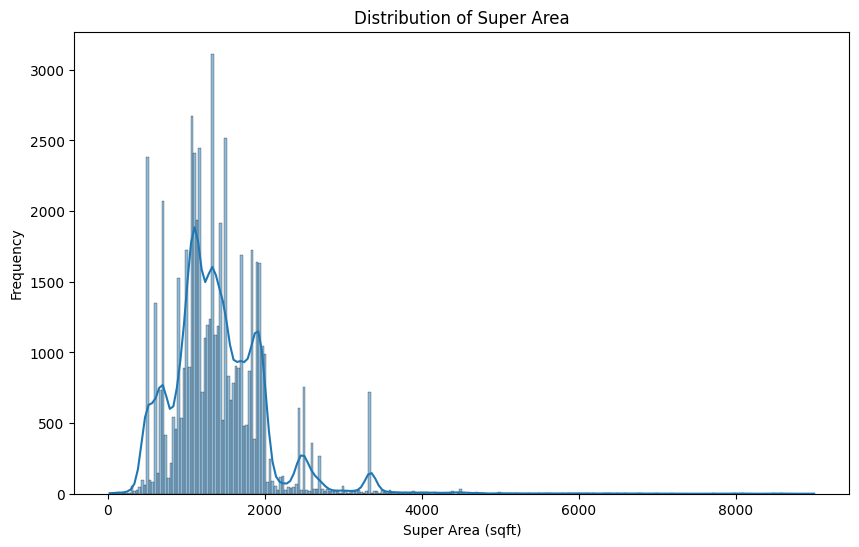

<class 'pandas.core.frame.DataFrame'>
Index: 146669 entries, 2621 to 164970
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Index                      146669 non-null  int64  
 1   Title                      146669 non-null  object 
 2   Description                146669 non-null  object 
 3   Amount(in rupees)          146669 non-null  object 
 4   Price (in rupees)          146669 non-null  float64
 5   location                   146669 non-null  object 
 6   Carpet Area                146669 non-null  float64
 7   Status                     146669 non-null  int64  
 8   Floor                      146669 non-null  object 
 9   Transaction                146669 non-null  object 
 10  Furnishing                 146669 non-null  int64  
 11  facing                     146669 non-null  float64
 12  overlooking                146669 non-null  object 
 13  Society                    1466

/tmp/ipython-input-3986886479.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Super Area'].fillna(median_super_area, inplace=True)


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['Super Area'].dropna(), kde=True)
plt.title('Distribution of Super Area')
plt.xlabel('Super Area (sqft)')
plt.ylabel('Frequency')
plt.show()

# Based on the distribution, impute null values.
# If the distribution is skewed, use median, otherwise use mean.
# From the histogram, we can see that the distribution is right-skewed, so we will use the median.

median_super_area = df['Super Area'].median()
df['Super Area'].fillna(median_super_area, inplace=True)

df.info()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146669 entries, 2621 to 164970
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Index                      146669 non-null  int64  
 1   Title                      146669 non-null  object 
 2   Description                146669 non-null  object 
 3   Amount(in rupees)          146669 non-null  object 
 4   Price (in rupees)          146669 non-null  float64
 5   location                   146669 non-null  object 
 6   Carpet Area                146669 non-null  float64
 7   Status                     146669 non-null  int64  
 8   Floor                      146669 non-null  object 
 9   Transaction                146669 non-null  object 
 10  Furnishing                 146669 non-null  int64  
 11  facing                     146669 non-null  float64
 12  overlooking                146669 non-null  object 
 13  Society                    1466

# Feature Engineering
- Add a BHK column that specifies the flat size

In [52]:
import re

# Using a lambda function directly with .apply()
df['BHK'] = df['Title'].apply(lambda title: int(re.search(r'(\d+)\s*BHK', title, re.IGNORECASE).group(1))
                                            if re.search(r'(\d+)\s*BHK', title, re.IGNORECASE) else None)

df.head()

Index                                              Title  \
2621   2621     1 BHK Ready to Occupy Flat for sale Chandkheda   
2622   2622       3 BHK Ready to Occupy Flat for sale Ambawadi   
2623   2623  3 BHK Ready to Occupy Flat for sale in Orchid ...   
2624   2624      2 BHK Ready to Occupy Flat for sale Satellite   
2625   2625  2 BHK Ready to Occupy Flat for sale in Nakshat...   

                                            Description Amount(in rupees)  \
2621  One can find this stunning 1 BHK flat for sale...         25.8 Lac    
2622  This attractive 3 BHK apartment can be found f...          1.45 Cr    
2623  One can find this stunning 3 BHK flat for sale...             2 Cr    
2624  Have a look at this immaculate 2 BHK flat for ...           55 Lac    
2625  Carefully laid out in the prime location of Na...           45 Lac    

      Price (in rupees)   location  Carpet Area  Status  \
2621             3251.0  ahmedabad        792.0       1   
2622             7090.0  ahmedabad       2045.0       1   
2623             9877.0  ahmedabad       1575.0       1   
2624             6111.0  ahmedabad         -1.0       1   
2625             3448.0  ahmedabad         -1.0       1   

                         Floor   Transaction  ...             Ownership  \
2621               3 out of 10        Resale  ...  Co-operative Society   
2622  Lower Basement out of 12  New Property  ...              Freehold   
2623              11 out of 11        Resale  ...              Freehold   
2624                3 out of 5        Resale  ...                    -1   
2625               9 out of 12        Resale  ...                    -1   

      Super Area Dimensions Plot Area  Amount(in Lacs of rupees)  \
2621      1332.0       -1.0      -1.0                       25.8   
2622      1332.0       -1.0      -1.0                      145.0   
2623      1332.0       -1.0      -1.0                      200.0   
2624       900.0       -1.0      -1.0                       55.0   
2625      1305.0       -1.0      -1.0                       45.0   

      CurrentFloor  TotalFloors Floor ratio  Floor level  BHK  
2621           3.0         10.0        0.30          Low  1.0  
2622          -1.0         -1.0       -1.00           -1  3.0  
2623          11.0         11.0        1.00         High  3.0  
2624           3.0          5.0        0.60          Mid  2.0  
2625           9.0         12.0        0.75         High  2.0  

[5 rows x 27 columns]

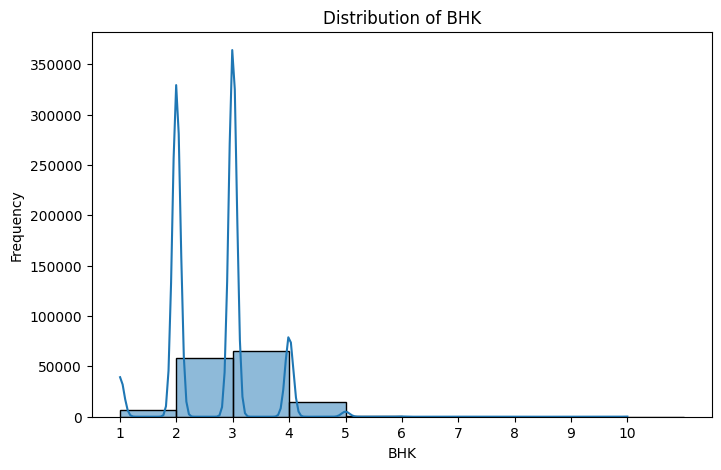

<class 'pandas.core.frame.DataFrame'>
Index: 146669 entries, 2621 to 164970
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Index                      146669 non-null  int64  
 1   Title                      146669 non-null  object 
 2   Description                146669 non-null  object 
 3   Amount(in rupees)          146669 non-null  object 
 4   Price (in rupees)          146669 non-null  float64
 5   location                   146669 non-null  object 
 6   Carpet Area                146669 non-null  float64
 7   Status                     146669 non-null  int64  
 8   Floor                      146669 non-null  object 
 9   Transaction                146669 non-null  object 
 10  Furnishing                 146669 non-null  int64  
 11  facing                     146669 non-null  float64
 12  overlooking                146669 non-null  object 
 13  Society                    1466

/tmp/ipython-input-639921746.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BHK'].fillna(median_bhk, inplace=True)


In [53]:
plt.figure(figsize=(8, 5))
sns.histplot(df['BHK'].dropna(), kde=True, bins=range(int(df['BHK'].min()), int(df['BHK'].max()) + 2))
plt.title('Distribution of BHK')
plt.xlabel('BHK')
plt.ylabel('Frequency')
plt.xticks(range(int(df['BHK'].min()), int(df['BHK'].max()) + 1))
plt.show()

# Based on the distribution, impute null values.
# The distribution is skewed, so we'll use the median.
median_bhk = df['BHK'].median()
df['BHK'].fillna(median_bhk, inplace=True)

df.info()

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146669 entries, 2621 to 164970
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Index                      146669 non-null  int64  
 1   Title                      146669 non-null  object 
 2   Description                146669 non-null  object 
 3   Amount(in rupees)          146669 non-null  object 
 4   Price (in rupees)          146669 non-null  float64
 5   location                   146669 non-null  object 
 6   Carpet Area                146669 non-null  float64
 7   Status                     146669 non-null  int64  
 8   Floor                      146669 non-null  object 
 9   Transaction                146669 non-null  object 
 10  Furnishing                 146669 non-null  int64  
 11  facing                     146669 non-null  float64
 12  overlooking                146669 non-null  object 
 13  Society                    1466

In [ ]:
df.to_csv("C:\CDAC\HousePricePredictor")

In [55]:
df1=df.copy()
df1.drop(columns=['Index','Title','Description','Amount(in rupees)','Floor','Society','Dimensions','Plot Area'],inplace=True)

In [56]:
df2=df1.copy()
df2.drop(columns=['Transaction','Furnishing','facing','overlooking','Ownership','Floor level','location'],inplace=True)

In [57]:
df1_ohe=pd.get_dummies(df1,columns=['Transaction','Furnishing','facing','overlooking','Ownership','Floor level','location'])
df1_ohe

Price (in rupees)  Carpet Area  Status  Bathroom  Balcony  \
2621               3251.0        792.0       1         1        1   
2622               7090.0       2045.0       1         3        1   
2623               9877.0       1575.0       1         3        1   
2624               6111.0         -1.0       1         2       -1   
2625               3448.0         -1.0       1         2       -1   
...                   ...          ...     ...       ...      ...   
164966             5307.0       1050.0       1         3        3   
164967             8333.0         -1.0       1         3       -1   
164968             4163.0       1050.0       1         2        3   
164969             8094.0        980.0       1         3        3   
164970             3728.0         -1.0       1         2       -1   

        Car Parking  Super Area  Amount(in Lacs of rupees)  CurrentFloor  \
2621              1      1332.0                       25.8           3.0   
2622              2      1332.0                      145.0          -1.0   
2623              2      1332.0                      200.0          11.0   
2624             -1       900.0                       55.0           3.0   
2625             -1      1305.0                       45.0           9.0   
...             ...         ...                        ...           ...   
164966           -1      1332.0                       82.0          17.0   
164967           -1      1788.0                      149.0           4.0   
164968            1      1332.0                       46.0          14.0   
164969            1      1332.0                      112.0          21.0   
164970           -1      1395.0                       52.0          17.0   

        TotalFloors  ...  location_ahmedabad  location_bangalore  \
2621           10.0  ...                True               False   
2622           -1.0  ...                True               False   
2623           11.0  ...                True               False   
2624            5.0  ...                True               False   
2625           12.0  ...                True               False   
...             ...  ...                 ...                 ...   
164966         23.0  ...               False               False   
164967          9.0  ...               False               False   
164968         25.0  ...               False               False   
164969         27.0  ...               False               False   
164970         21.0  ...               False               False   

        location_chennai  location_faridabad  location_greater-noida  \
2621               False               False                   False   
2622               False               False                   False   
2623               False               False                   False   
2624               False               False                   False   
2625               False               False                   False   
...                  ...                 ...                     ...   
164966             False               False                    True   
164967             False               False                    True   
164968             False               False                    True   
164969             False               False                    True   
164970             False               False                    True   

        location_gurgaon  location_hyderabad  location_jaipur  \
2621               False               False            False   
2622               False               False            False   
2623               False               False            False   
2624               False               False            False   
2625               False               False            False   
...                  ...                 ...              ...   
164966             False               False            False   
164967             False               False            False   

In [58]:
df1_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146669 entries, 2621 to 164970
Data columns (total 65 columns):
 #   Column                                                   Non-Null Count   Dtype  
---  ------                                                   --------------   -----  
 0   Price (in rupees)                                        146669 non-null  float64
 1   Carpet Area                                              146669 non-null  float64
 2   Status                                                   146669 non-null  int64  
 3   Bathroom                                                 146669 non-null  int64  
 4   Balcony                                                  146669 non-null  int64  
 5   Car Parking                                              146669 non-null  int64  
 6   Super Area                                               146669 non-null  float64
 7   Amount(in Lacs of rupees)                                146669 non-null  float64
 8   CurrentFloor    

In [59]:
df1_ohe

Price (in rupees)  Carpet Area  Status  Bathroom  Balcony  \
2621               3251.0        792.0       1         1        1   
2622               7090.0       2045.0       1         3        1   
2623               9877.0       1575.0       1         3        1   
2624               6111.0         -1.0       1         2       -1   
2625               3448.0         -1.0       1         2       -1   
...                   ...          ...     ...       ...      ...   
164966             5307.0       1050.0       1         3        3   
164967             8333.0         -1.0       1         3       -1   
164968             4163.0       1050.0       1         2        3   
164969             8094.0        980.0       1         3        3   
164970             3728.0         -1.0       1         2       -1   

        Car Parking  Super Area  Amount(in Lacs of rupees)  CurrentFloor  \
2621              1      1332.0                       25.8           3.0   
2622              2      1332.0                      145.0          -1.0   
2623              2      1332.0                      200.0          11.0   
2624             -1       900.0                       55.0           3.0   
2625             -1      1305.0                       45.0           9.0   
...             ...         ...                        ...           ...   
164966           -1      1332.0                       82.0          17.0   
164967           -1      1788.0                      149.0           4.0   
164968            1      1332.0                       46.0          14.0   
164969            1      1332.0                      112.0          21.0   
164970           -1      1395.0                       52.0          17.0   

        TotalFloors  ...  location_ahmedabad  location_bangalore  \
2621           10.0  ...                True               False   
2622           -1.0  ...                True               False   
2623           11.0  ...                True               False   
2624            5.0  ...                True               False   
2625           12.0  ...                True               False   
...             ...  ...                 ...                 ...   
164966         23.0  ...               False               False   
164967          9.0  ...               False               False   
164968         25.0  ...               False               False   
164969         27.0  ...               False               False   
164970         21.0  ...               False               False   

        location_chennai  location_faridabad  location_greater-noida  \
2621               False               False                   False   
2622               False               False                   False   
2623               False               False                   False   
2624               False               False                   False   
2625               False               False                   False   
...                  ...                 ...                     ...   
164966             False               False                    True   
164967             False               False                    True   
164968             False               False                    True   
164969             False               False                    True   
164970             False               False                    True   

        location_gurgaon  location_hyderabad  location_jaipur  \
2621               False               False            False   
2622               False               False            False   
2623               False               False            False   
2624               False               False            False   
2625               False               False            False   
...                  ...                 ...              ...   
164966             False               False            False   
164967             False               False            False   

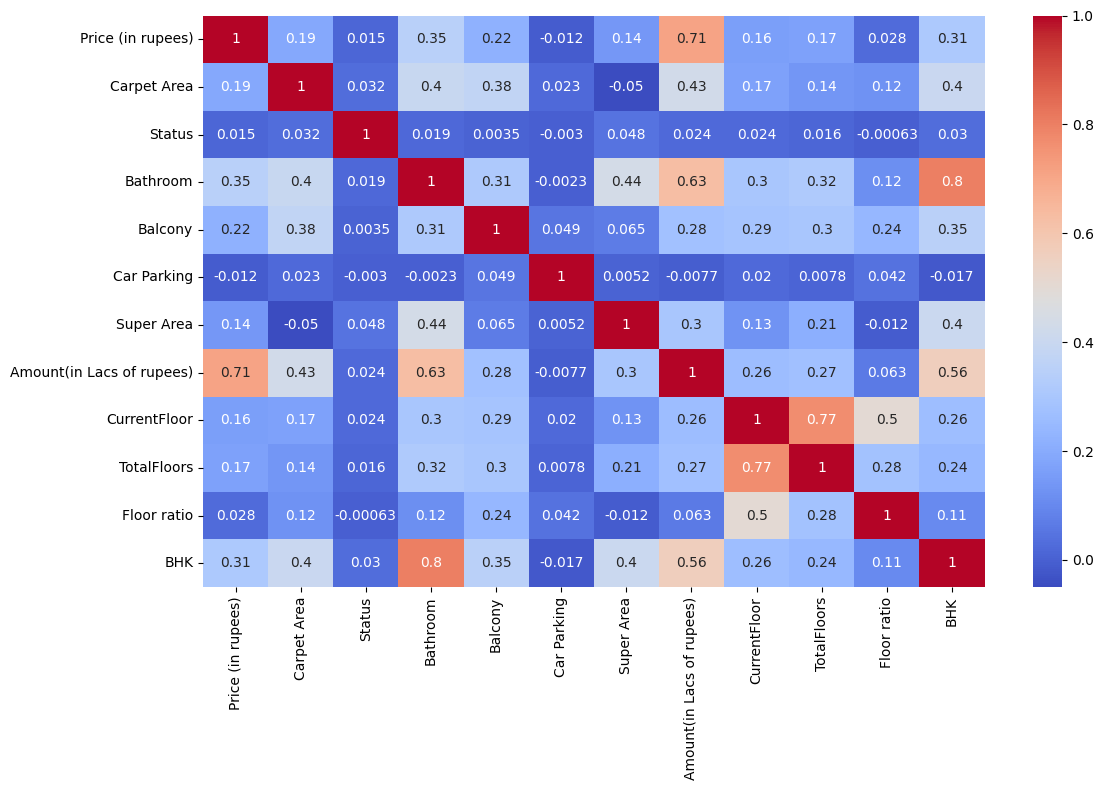

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(),annot=True,cmap='coolwarm')
plt.tight_layout()
plt.show()

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(100,120))
sns.heatmap(df1_ohe.corr(),annot=True,cmap='coolwarm')
plt.tight_layout()
plt.show()

In [62]:
df1_ohe.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 146669 entries, 2621 to 164970
Data columns (total 65 columns):
 #   Column                                                   Non-Null Count   Dtype  
---  ------                                                   --------------   -----  
 0   Price (in rupees)                                        146669 non-null  float64
 1   Carpet Area                                              146669 non-null  float64
 2   Status                                                   146669 non-null  int64  
 3   Bathroom                                                 146669 non-null  int64  
 4   Balcony                                                  146669 non-null  int64  
 5   Car Parking                                              146669 non-null  int64  
 6   Super Area                                               146669 non-null  float64
 7   Amount(in Lacs of rupees)                                146669 non-null  float64
 8   CurrentFloor    

In [63]:
df1_ohe['BHK'].isna().sum()
df1_ohe['Super Area'].isna().sum()

np.int64(0)

<Axes: >

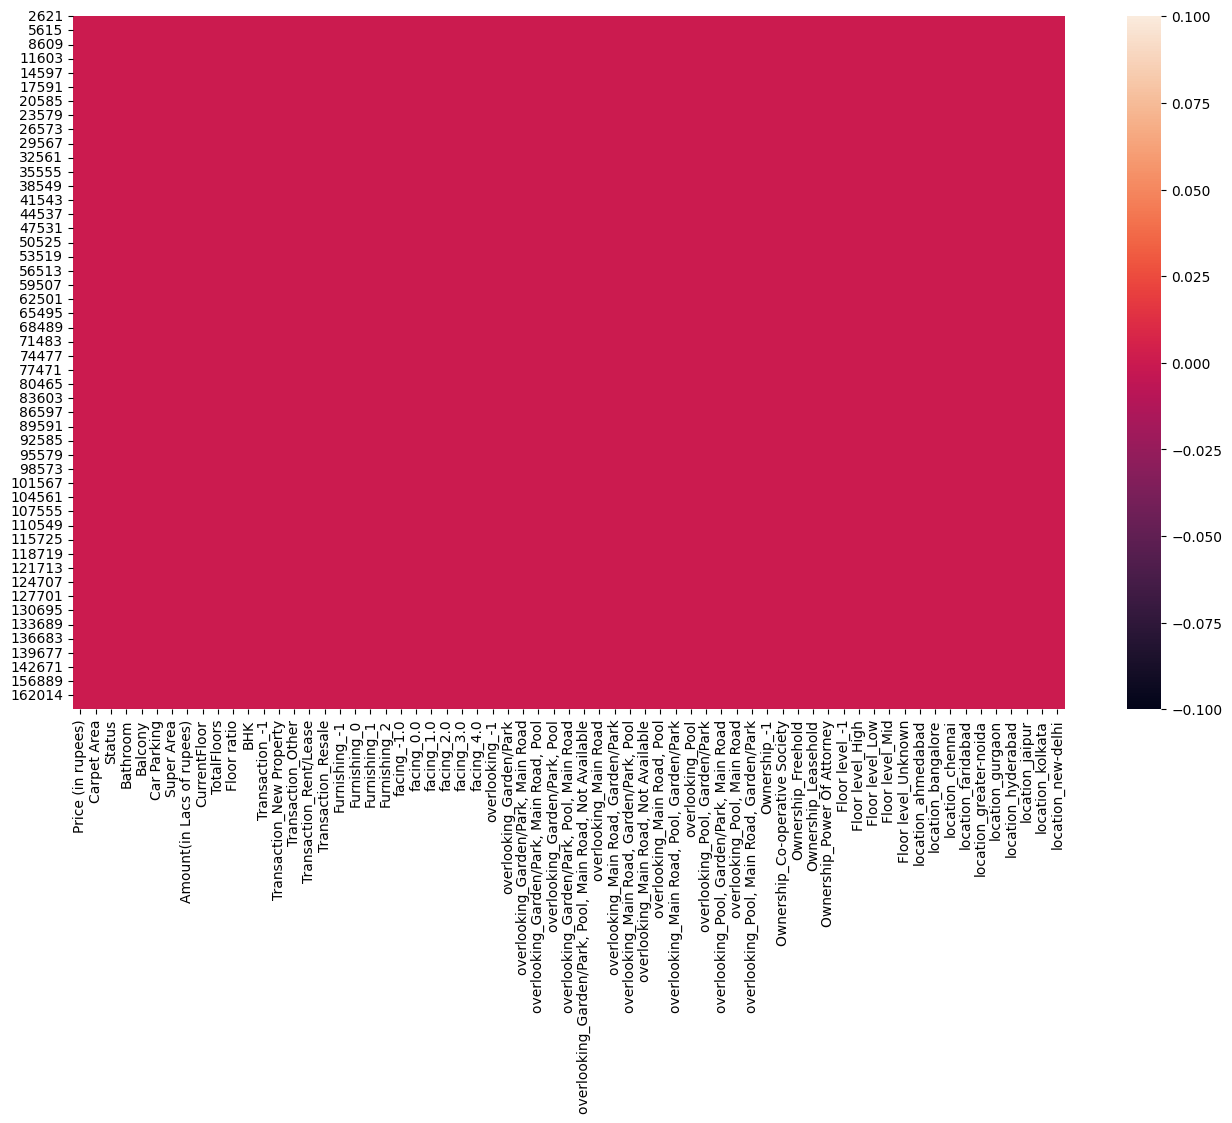

In [64]:
plt.figure(figsize=(16,9))
sns.heatmap(df1_ohe.isnull())

# Data Normalization

In [65]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns (excluding boolean columns created by one-hot encoding)
numerical_cols = df1_ohe.select_dtypes(include=['float64', 'int64']).columns

# Apply StandardScaler to numerical columns
scaler = StandardScaler()
df1_ohe[numerical_cols] = scaler.fit_transform(df1_ohe[numerical_cols])

df1_ohe.head()

Price (in rupees)  Carpet Area    Status  Bathroom   Balcony  \
2621          -0.781220     0.104498  0.056396 -1.636485 -0.157424   
2622           0.014187     1.317563  0.056396  0.609857 -0.157424   
2623           0.591629     0.862543  0.056396  0.609857 -0.157424   
2624          -0.188653    -0.663227  0.056396 -0.513314 -1.474021   
2625          -0.740404    -0.663227  0.056396 -0.513314 -1.474021   

      Car Parking  Super Area  Amount(in Lacs of rupees)  CurrentFloor  \
2621    -0.015053   -0.075097                  -0.692360     -0.244356   
2622     0.031683   -0.075097                   0.179003     -1.081002   
2623     0.031683   -0.075097                   0.581058      1.428937   
2624    -0.108526   -1.171216                  -0.478906     -0.244356   
2625    -0.108526   -0.143604                  -0.552007      1.010614   

      TotalFloors  ...  location_ahmedabad  location_bangalore  \
2621     0.247858  ...                True               False   
2622    -1.113160  ...                True               False   
2623     0.371587  ...                True               False   
2624    -0.370787  ...                True               False   
2625     0.495315  ...                True               False   

      location_chennai  location_faridabad  location_greater-noida  \
2621             False               False                   False   
2622             False               False                   False   
2623             False               False                   False   
2624             False               False                   False   
2625             False               False                   False   

      location_gurgaon  location_hyderabad  location_jaipur  location_kolkata  \
2621             False               False            False             False   
2622             False               False            False             False   
2623             False               False            False             False   
2624             False               False            False             False   
2625             False               False            False             False   

      location_new-delhi  
2621               False  
2622               False  
2623               False  
2624               False  
2625               False  

[5 rows x 65 columns]

# Model Building

### Simple Linear Regression

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
X=df1_ohe.drop(columns=['Amount(in Lacs of rupees)'])
y=df1_ohe['Amount(in Lacs of rupees)']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=2)

In [68]:
lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [69]:
y_pred=lr.predict(X_test)

In [70]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mse)
print(r2)

0.3159720993321782
0.7035703321763467


## SGD Regression

Hyperparameters to be tuned - learning rate

In [71]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



In [72]:
sgd = Pipeline([ ('sgd_regressor', SGDRegressor())])

sgd.fit(X_train, y_train)

Pipeline(steps=[('sgd_regressor', SGDRegressor())])

In [73]:
y_pred=sgd.predict(X_test)

In [74]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mse)
print(r2)

0.41995280505733035
0.6060206873712461


# Random Forest Regression

In [75]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [76]:
y_pred=model.predict(X_test)

In [77]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mse)
print(r2)

0.05925565655563694
0.9444092227554753


In [78]:
model.score(X_test,y_test)

0.9444092227554753

# Support Vector Regression

In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel='linear', C=1)  # Linear SVR with regularization
svr.fit(X_train , y_train)

y_pred_svr = svr.predict(X_test)

print("\nSupport Vector Regression:")
print("R² Score:", r2_score(y_test, y_pred_svr))
print("RMSE:", mean_squared_error(y_test, y_pred_svr, squared=False))


In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel='linear', C=1)  # Linear SVR with regularization
svr.fit(X_train , y_train)

y_pred_svr = svr.predict(X_test)

print("\nSupport Vector Regression:")
print("R² Score:", r2_score(y_test, y_pred_svr))
print("RMSE:", mean_squared_error(y_test, y_pred_svr, squared=False))
